# Прикладная статистика и анализ данных
## Задание 2.10


**Правила:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ad21_bot`.
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* **Любую задачу, даже ее часть, можно выполнять как в Питоне, так и в R**.
* Теоретические задачи необходимо оформить в latex/markdown и прислать `pdf` или же прислать фотку в правильной ориентации рукописного решения, где **все четко видно**.
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Публикация решения может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него.
* Никакой код из данного задания при проверке запускаться не будет.
* В каждой задаче не забывайте делать **пояснения и выводы**.

**Баллы за задание:**

* Задача 1 &mdash; 2 балла;
* Задача 2 &mdash; 4 балла;
* Задача 3 &mdash; 4 балла;
* Задача 4 &mdash; 10 баллов.

### Задача 1.

Выберите несколько человек (не менее 5) с DS-потока по состоянию на осенний семестр и сравните их успеваемость методами дисперсионного анализа, рассмотрев оценки по всем практическим заданиям. Обратите внимание, что в отличии от примера с презентации в данном случае исследуемым фактором является человек, а задание &mdash; мешающий фактор.

### Задача 2.

Используя теорему о разложении гауссовского вектора получите $F$-критерий однофакторного дисперсионного анализа для случая независимых выборок.

### Задача 3.

Рассмотрим модель $X_{ij} = \mu + \alpha_i + \beta_j + \varepsilon_{ij}, i=1..n, j=1..k$ однофакторного дисперсионного анализа для случая связных выборок. Фактор отвечает за степень воздействия на объект, поэтому в качестве альтернативной гипотезы рассматривается $\mathsf{H}_1\colon \beta_1 \leqslant ... \leqslant \beta_k$. Исследуйте поведение мощности критериев Фридмана и Пейджа в зависимости от размера выборки, количества групп, а также вида распределения шума $\varepsilon_{ij}$, если на самом деле $\beta_j = j\beta$, где $\beta > 0$. 

### Задача 4.

На занятии был разобран на Питоне первый этап дисперсионного анализа данных о внебрачных отношениях. Выполните в R следующие задания:
* Разделите данные на две части в зависимости от того, изменял ли человек супругу(е).
* Повторите проведенный на занятии анализ. Имеет ли смысл в некоторых случаях рассматривать альтернативную гипотезу вида $\mathsf{H}_1\colon \beta_1 \leqslant ... \leqslant \beta_k$?
* Проведите post-hoc анализ там, где это необходимо.
* Проверьте, есть ли зависимость от того, заняты супруги одним и тем же видом деятельности (по категориям) или разными.
* Исследуйте совместное влияние некоторых фактором методами многофакторного дисперсионного анализа. Поясните, почему вы выбрали именно эти факторы.
* По результатам исследования сделайте выводы о семейной жизни.

Сразу отметим, что альтернативу вида H1 нет смысла рассматривать, так как у нас не тот случай, что от разных признаков будет расти эффект (как, например, от дозы препарата).

In [156]:
?read.table

In [157]:
data = read.csv('fair.csv')
head(data)

,X,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,3,32,9.0,3,3,17,2,5,0.1111111
2,1,3,27,13.0,3,1,14,3,4,3.2307692
3,2,4,22,2.5,0,1,16,3,5,1.3999996
4,3,4,37,16.5,4,3,16,5,5,0.7272727
5,4,5,27,9.0,1,1,14,3,4,4.6666660
6,5,4,27,9.0,0,2,14,3,4,4.6666660


In [158]:
mean(data['affairs'] == 0)

[1] 0.6775055

* Разделите данные на две части в зависимости от того, изменял ли человек супругу(е).

Рассмотрим, как на семинаре, только данные, где параметр `affairs` > 0.

In [159]:
data <- data[data$affairs > 0,]
head(data)

,X,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,3,32,9.0,3,3,17,2,5,0.1111111
2,1,3,27,13.0,3,1,14,3,4,3.2307692
3,2,4,22,2.5,0,1,16,3,5,1.3999996
4,3,4,37,16.5,4,3,16,5,5,0.7272727
5,4,5,27,9.0,1,1,14,3,4,4.6666660
6,5,4,27,9.0,0,2,14,3,4,4.6666660


Посмотрим на данные.

In [160]:
summary(data$affairs)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 0.04348  0.52174  1.21739  2.18724  2.17778 57.59999 

In [161]:
?hist

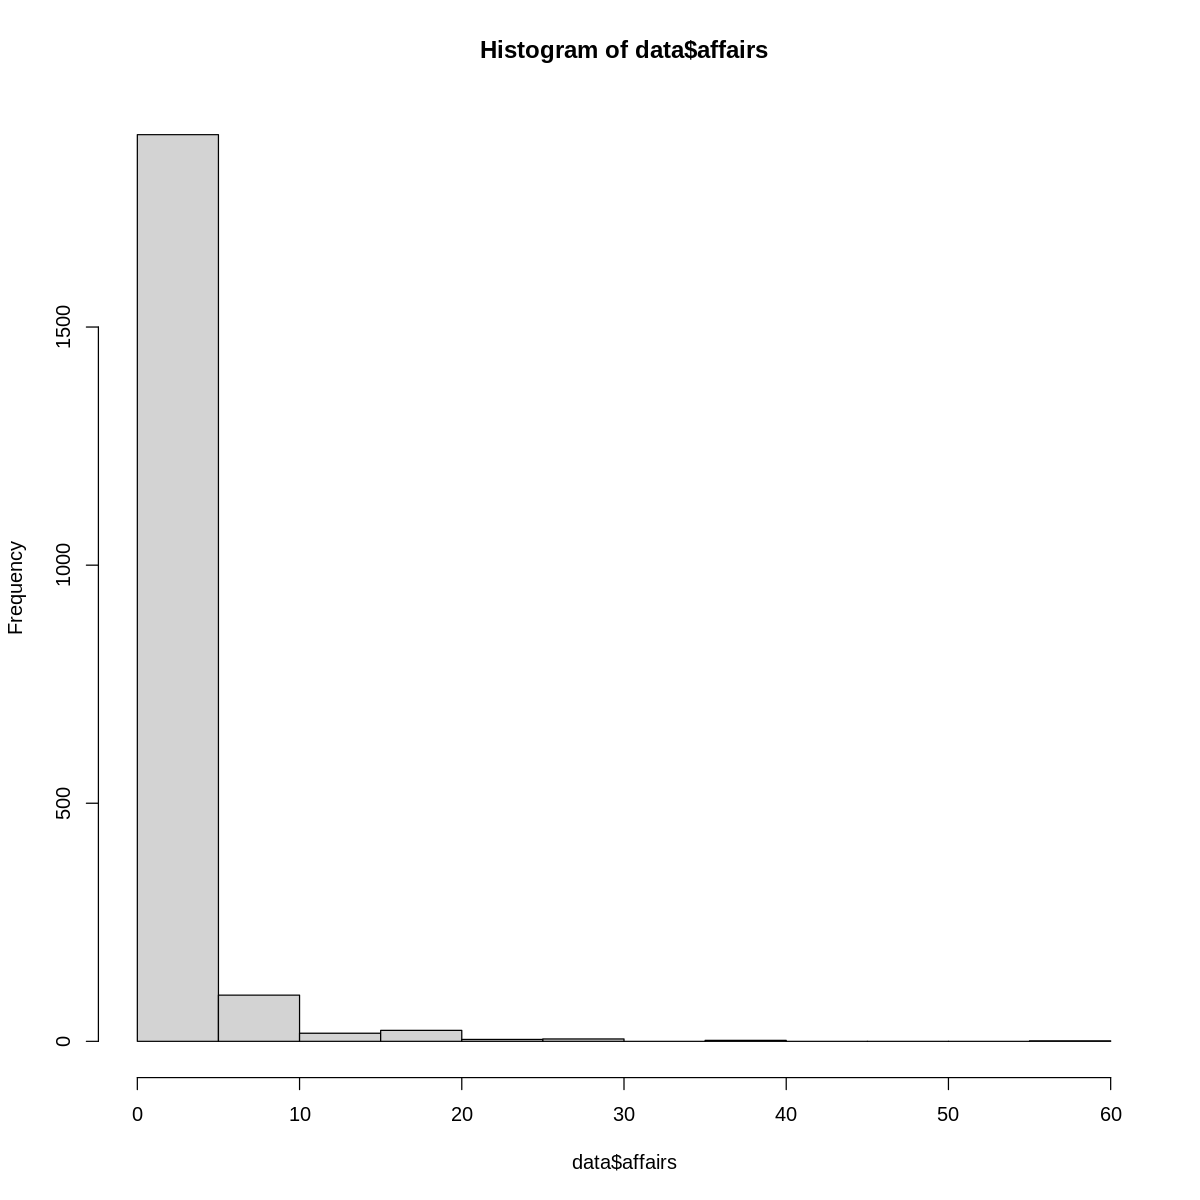

In [162]:
hist(data$affairs)

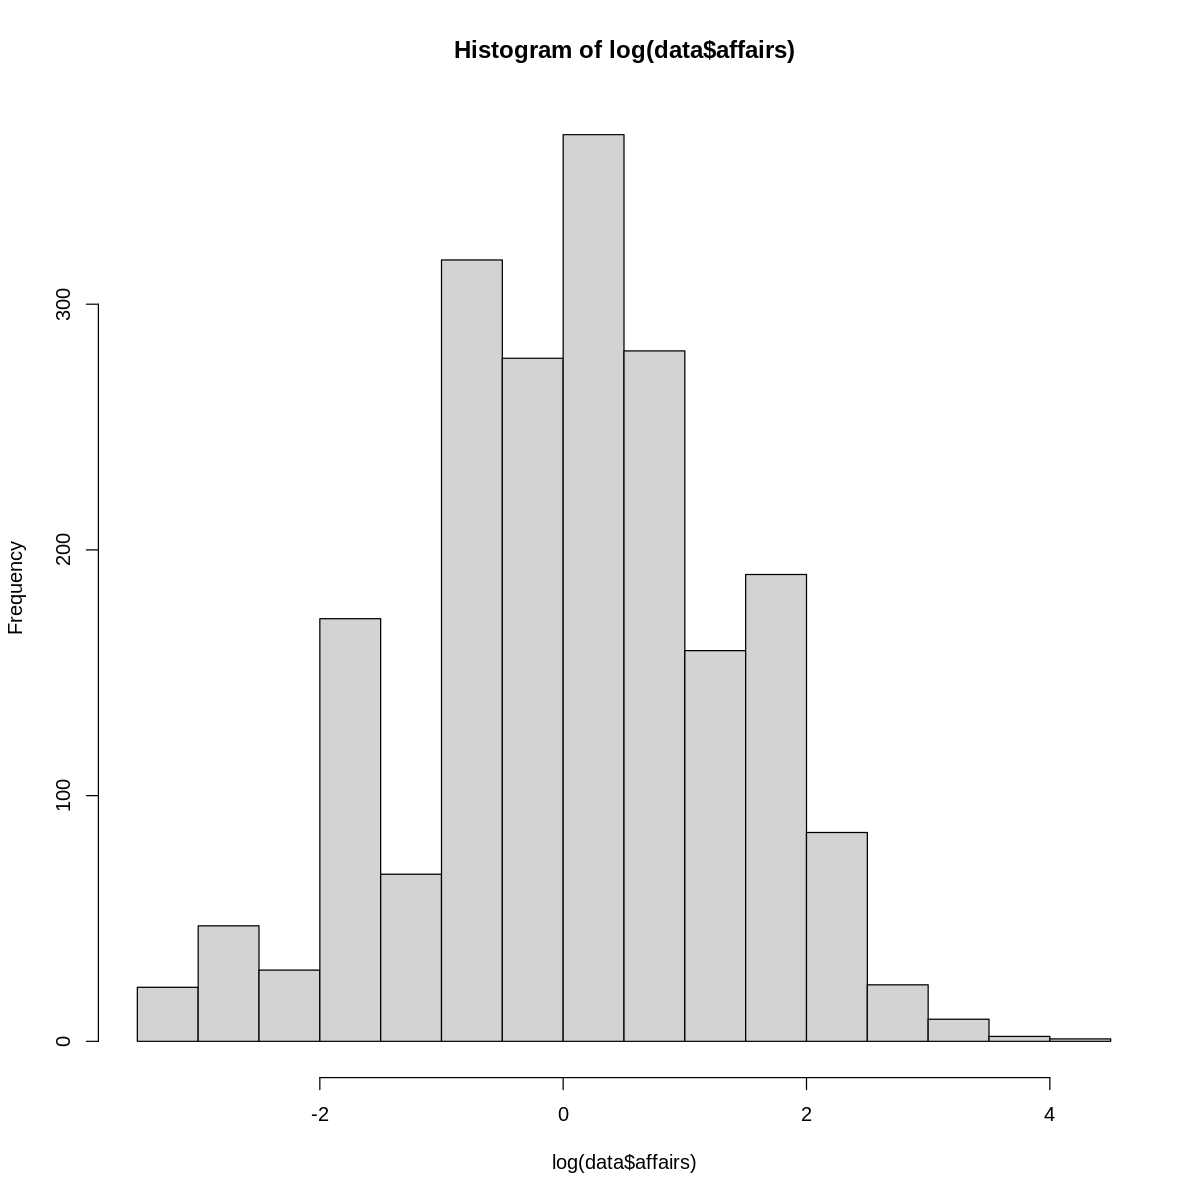

In [163]:
hist(log(data$affairs))

In [164]:
shapiro.test(log(data$affairs))


	Shapiro-Wilk normality test

data:  log(data$affairs)
W = 0.98998, p-value = 9.865e-11


Видно, что данные логарифма отдаленно похожи на нормальные, однако критерий Шапиро-Уилка отвергает нормальность. Посмотрим QQ-плот.

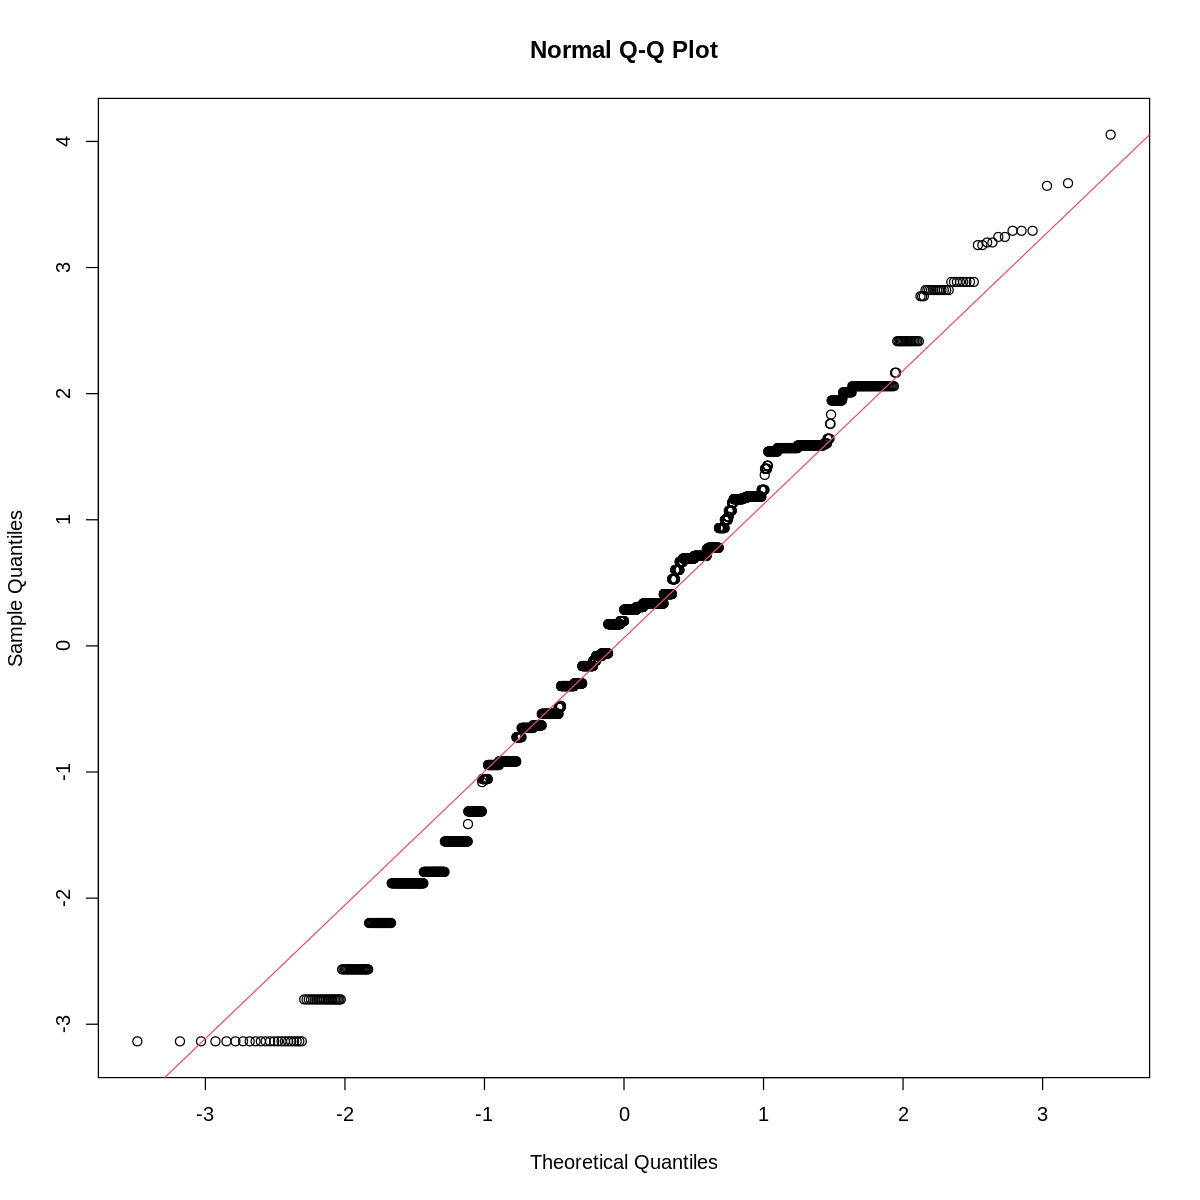

In [166]:
qqnorm(log(data$affairs))
qqline(log(data$affairs), col = 2)

QQ-плот тоже немного похож на нормальный. Возможно, нормальности мешает то, что данные довольно сильно дискретны.

## Анализ влияния факторов


	Kruskal-Wallis rank sum test

data:  log(affairs) by rate_marriage
Kruskal-Wallis chi-squared = 18.798, df = 4, p-value = 0.0008611



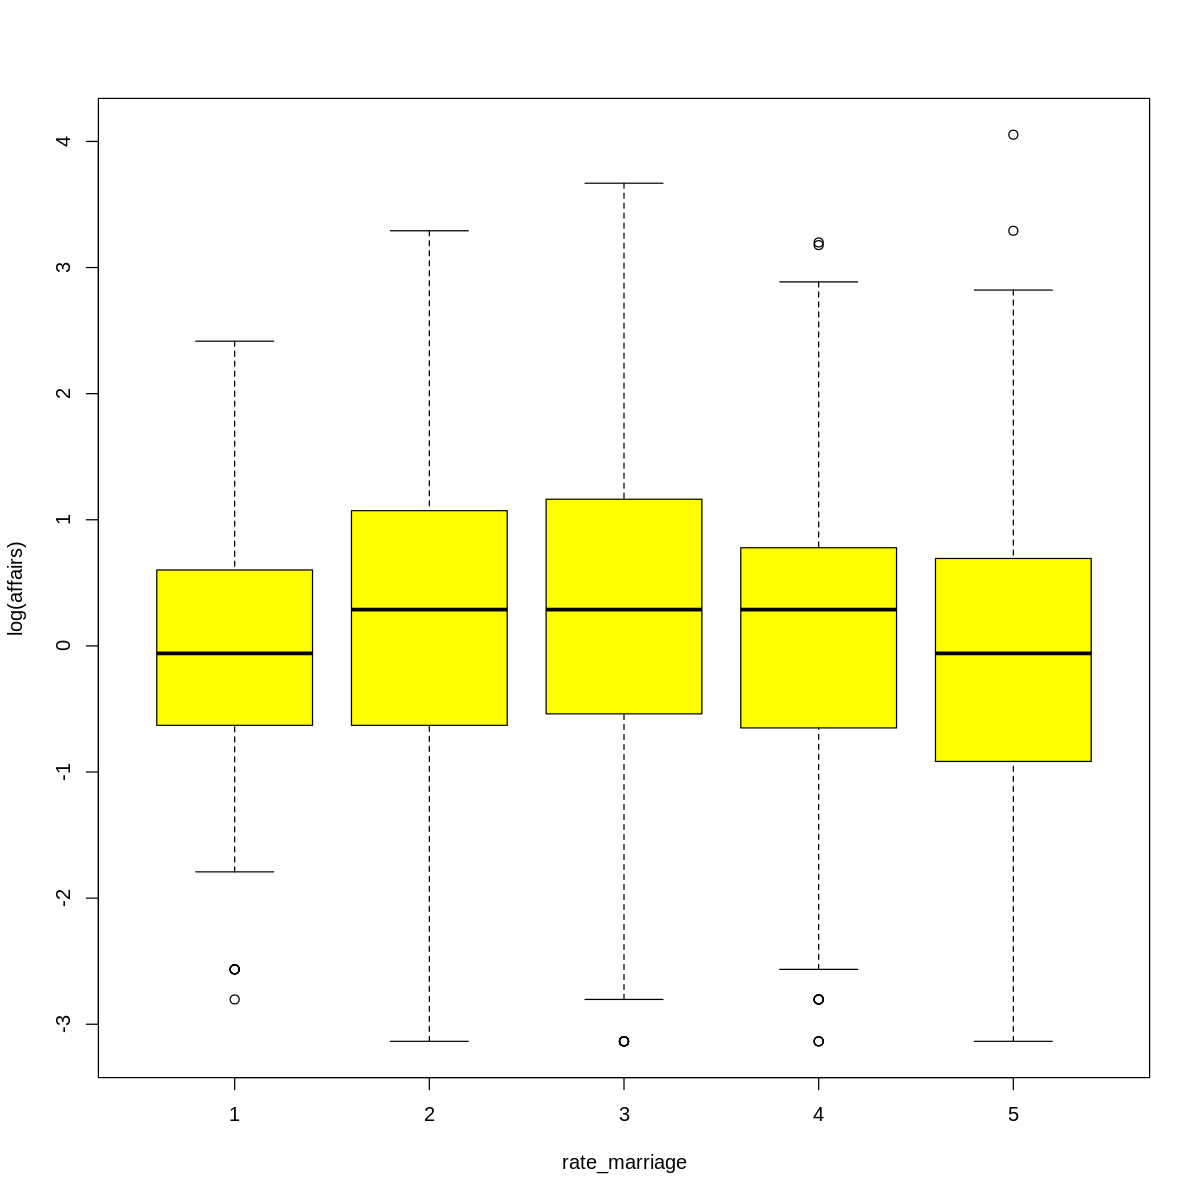

In [134]:
# применяем критерий Краскела-Уоллиса
kruskal_result_rate_marriage = kruskal.test(log(affairs) ~ rate_marriage, data)
print(kruskal_result_rate_marriage)
    
# Рисуем boxplot
options(repr.plot.width=10, repr.plot.height=10)
boxplot(log(affairs) ~ rate_marriage, data, col = 'yellow')


	Kruskal-Wallis rank sum test

data:  log(affairs) by age
Kruskal-Wallis chi-squared = 366.92, df = 5, p-value < 2.2e-16



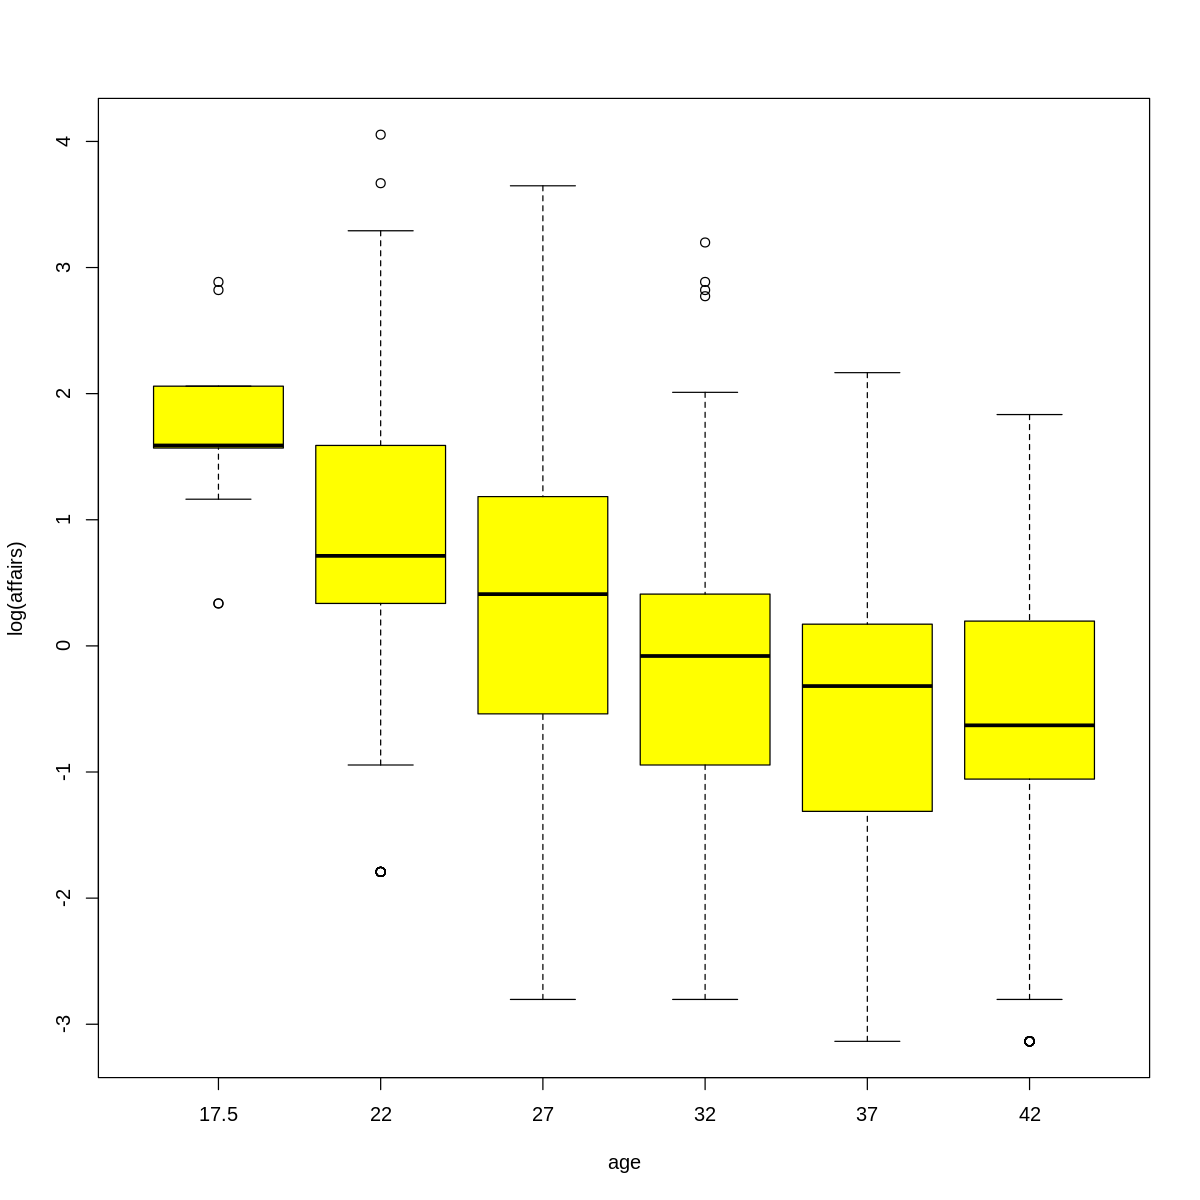

In [135]:
# применяем критерий Краскела-Уоллиса
kruskal_result_age = kruskal.test(log(affairs) ~ age, data)
print(kruskal_result_age)
    

# Рисуем boxplot
options(repr.plot.width=10, repr.plot.height=10)
boxplot(log(affairs) ~ age, data, col = 'yellow')


	Kruskal-Wallis rank sum test

data:  log(affairs) by yrs_married
Kruskal-Wallis chi-squared = 465.66, df = 6, p-value < 2.2e-16



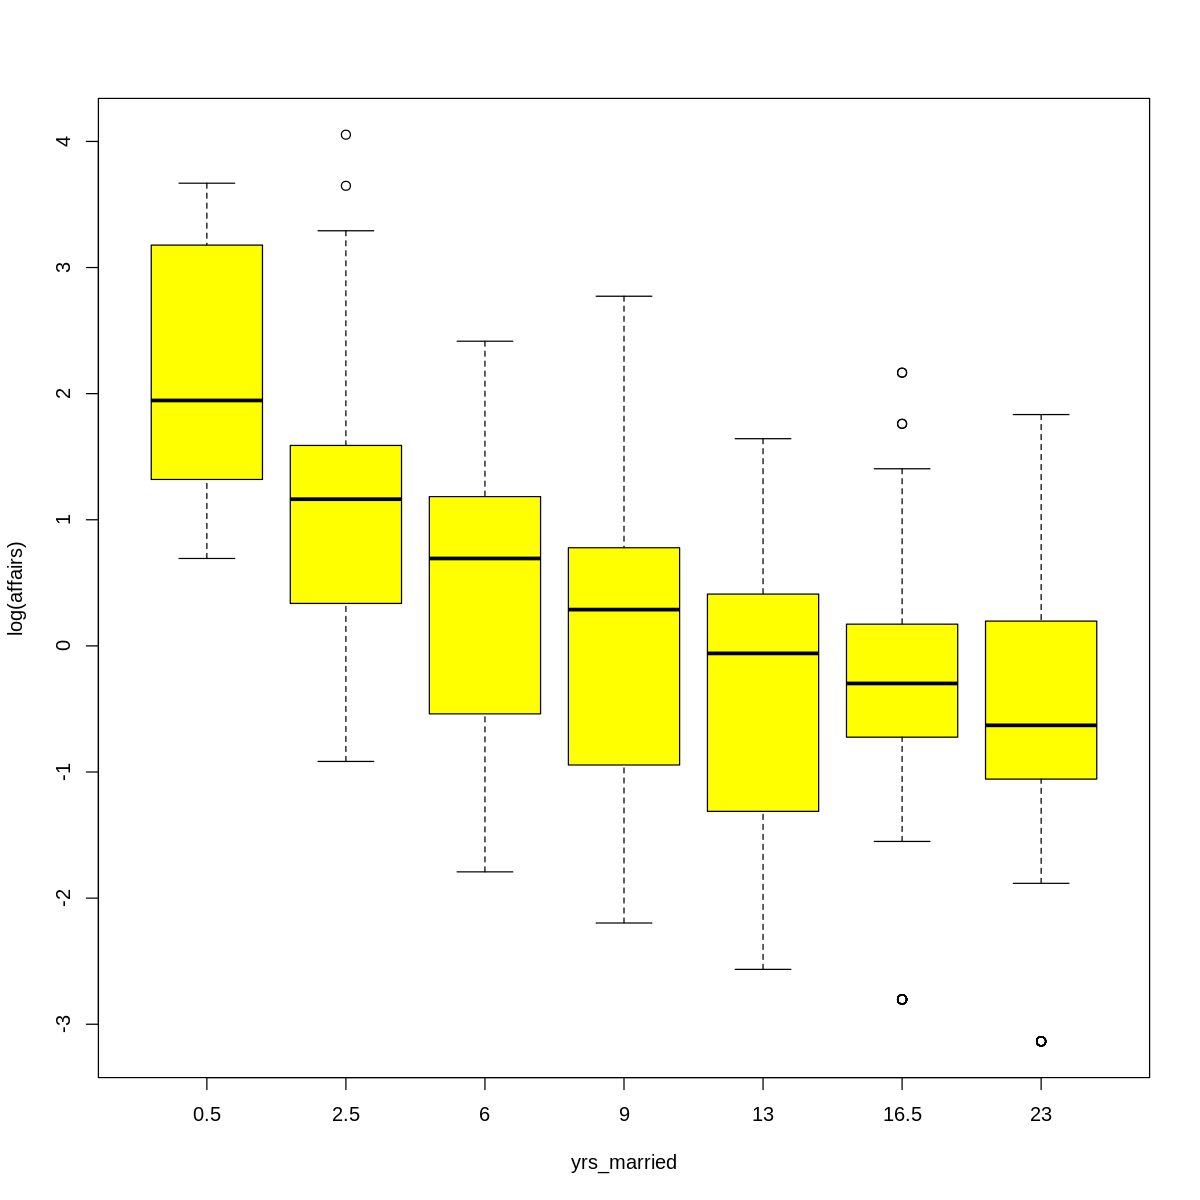

In [136]:
# применяем критерий Краскела-Уоллиса
kruskal_result_yrs_married = kruskal.test(log(affairs) ~ yrs_married, data)
print(kruskal_result_yrs_married)

# Рисуем boxplot
options(repr.plot.width=10, repr.plot.height=10)
boxplot(log(affairs) ~ yrs_married, data, col = 'yellow')


	Kruskal-Wallis rank sum test

data:  log(affairs) by children
Kruskal-Wallis chi-squared = 313.22, df = 5, p-value < 2.2e-16



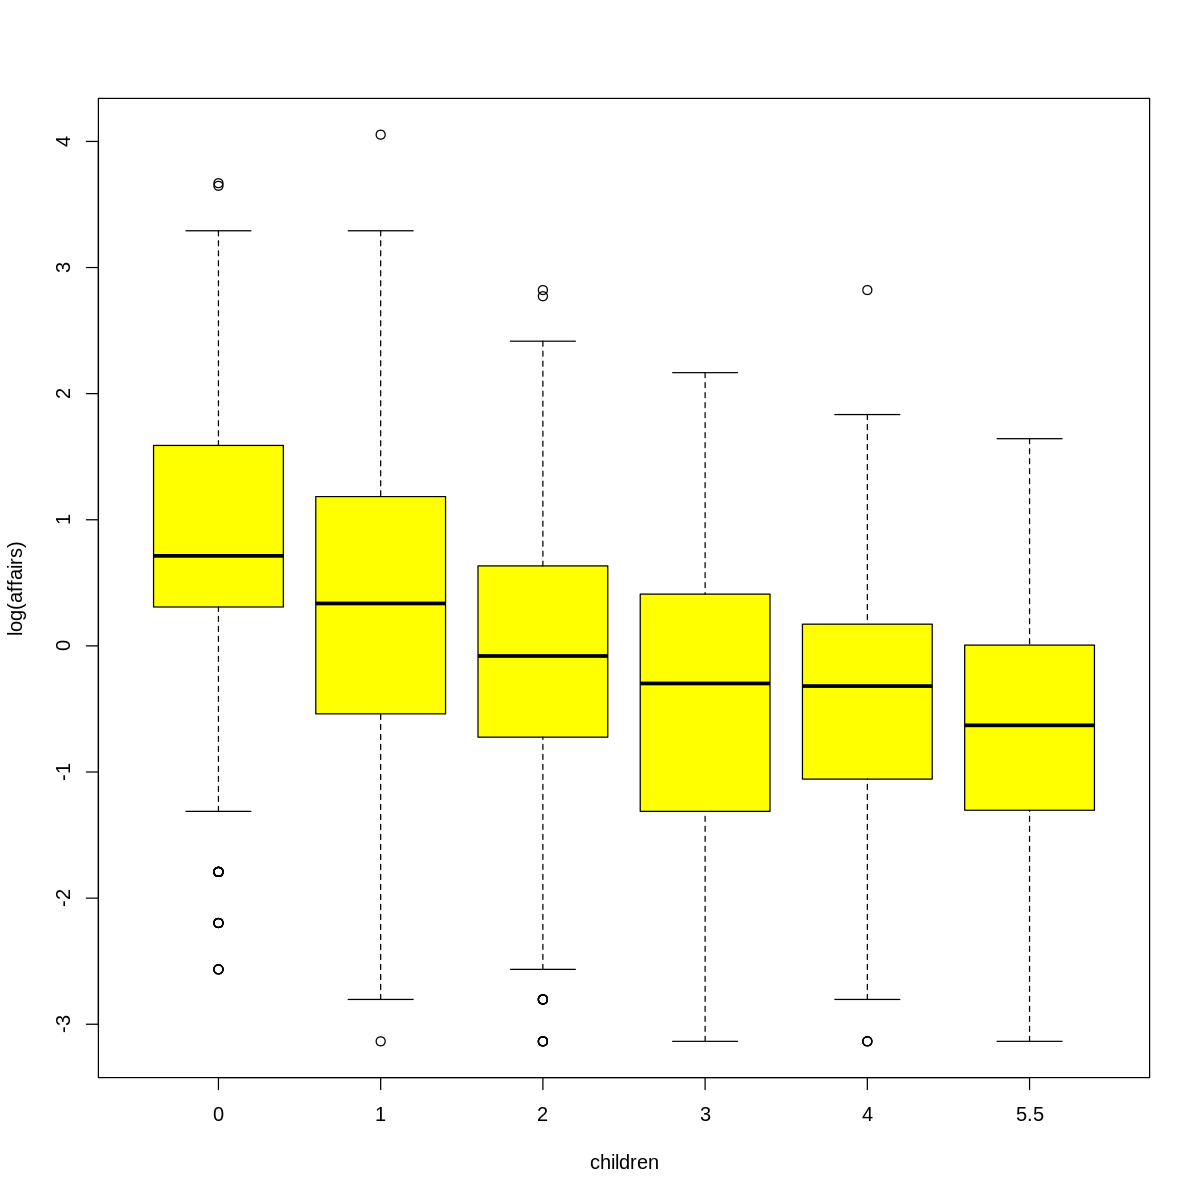

In [138]:
# применяем критерий Краскела-Уоллиса
kruskal_result_children = kruskal.test(log(affairs) ~ children, data)
print(kruskal_result_children)
    
# Рисуем boxplot
options(repr.plot.width=10, repr.plot.height=10)
boxplot(log(affairs) ~ children, data, col = 'yellow')


	Kruskal-Wallis rank sum test

data:  log(affairs) by religious
Kruskal-Wallis chi-squared = 44.567, df = 3, p-value = 1.144e-09



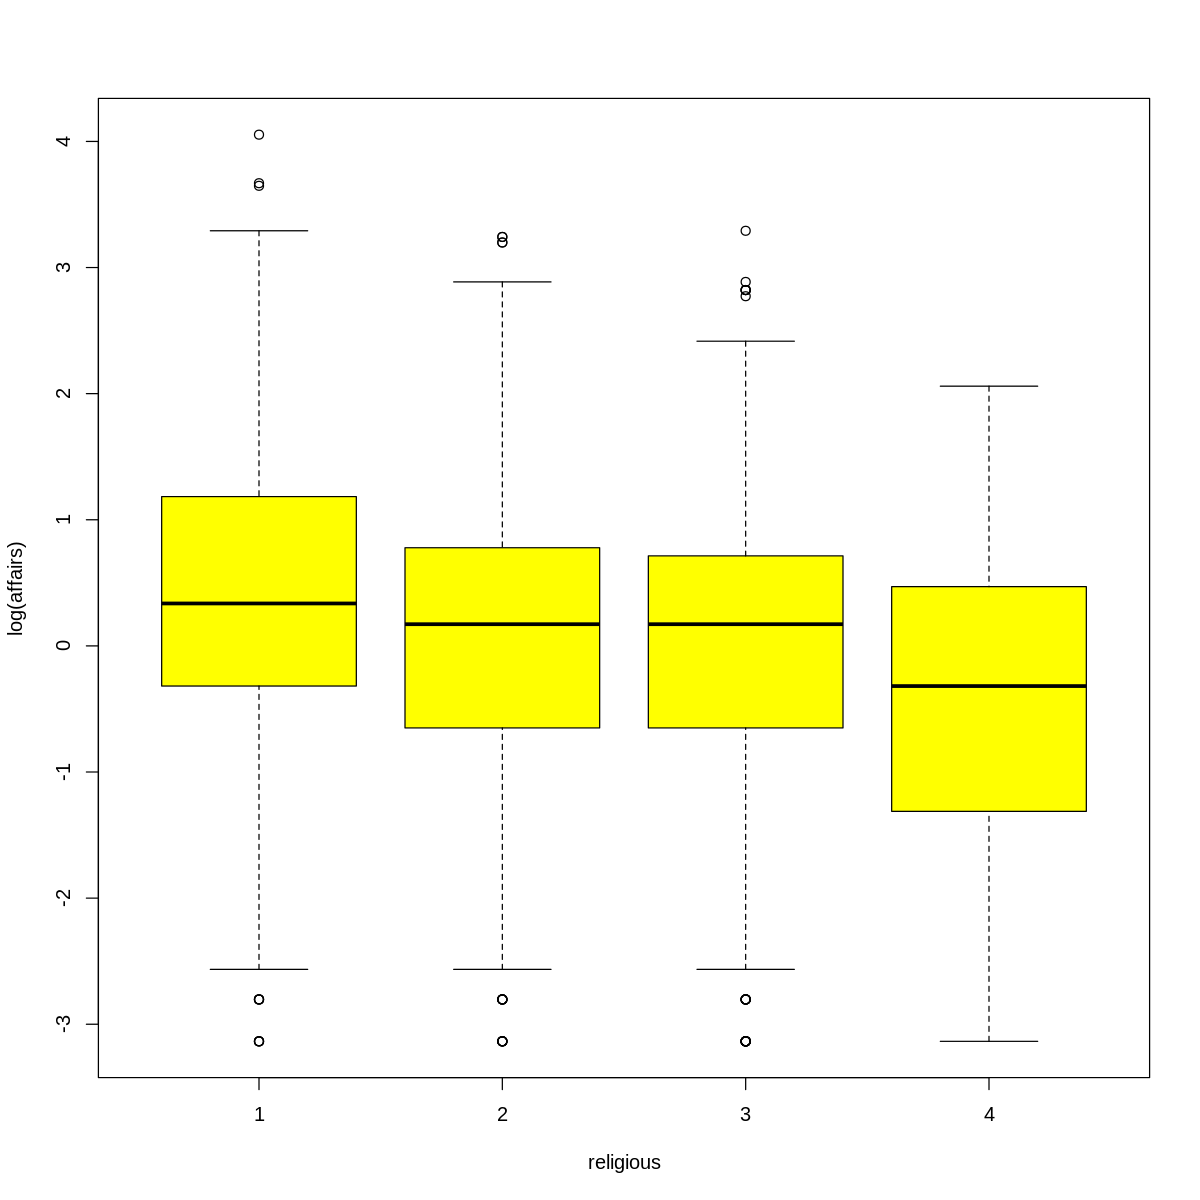

In [139]:
# применяем критерий Краскела-Уоллиса
kruskal_result_religious = kruskal.test(log(affairs) ~ religious, data)
print(kruskal_result_religious)
    
# Рисуем boxplot
options(repr.plot.width=10, repr.plot.height=10)
boxplot(log(affairs) ~ religious, data, col = 'yellow')


	Kruskal-Wallis rank sum test

data:  log(affairs) by educ
Kruskal-Wallis chi-squared = 12.061, df = 5, p-value = 0.03396



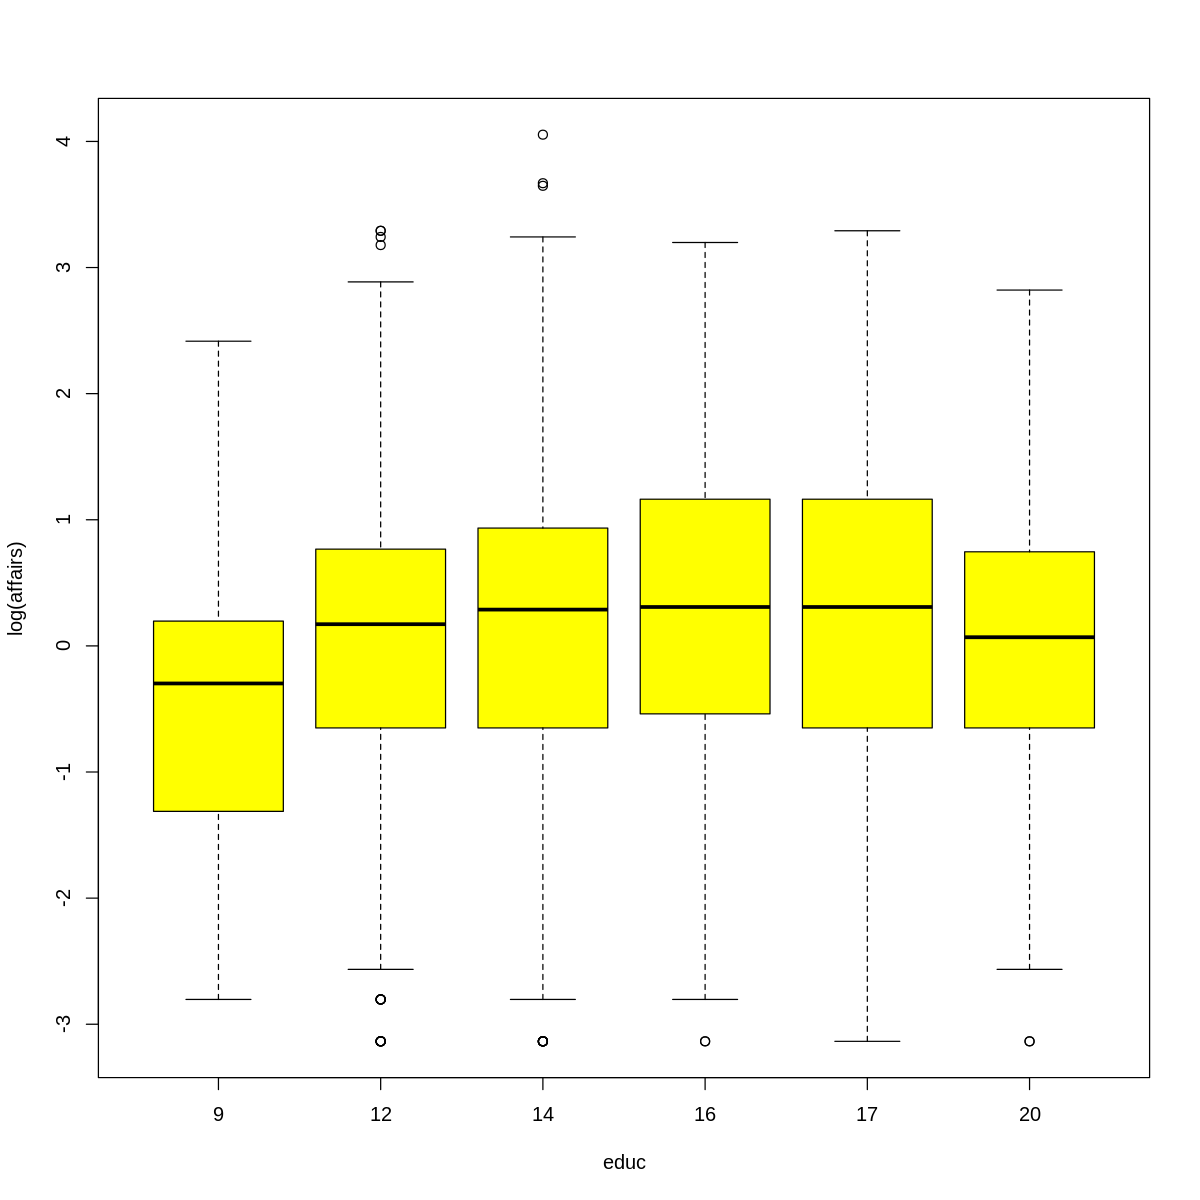

In [140]:
# применяем критерий Краскела-Уоллиса
kruskal_result_educ = kruskal.test(log(affairs) ~ educ, data)
print(kruskal_result_educ)
    
# Рисуем boxplot
options(repr.plot.width=10, repr.plot.height=10)
boxplot(log(affairs) ~ educ, data, col = 'yellow')


	Kruskal-Wallis rank sum test

data:  log(affairs) by occupation
Kruskal-Wallis chi-squared = 10.438, df = 5, p-value = 0.06373



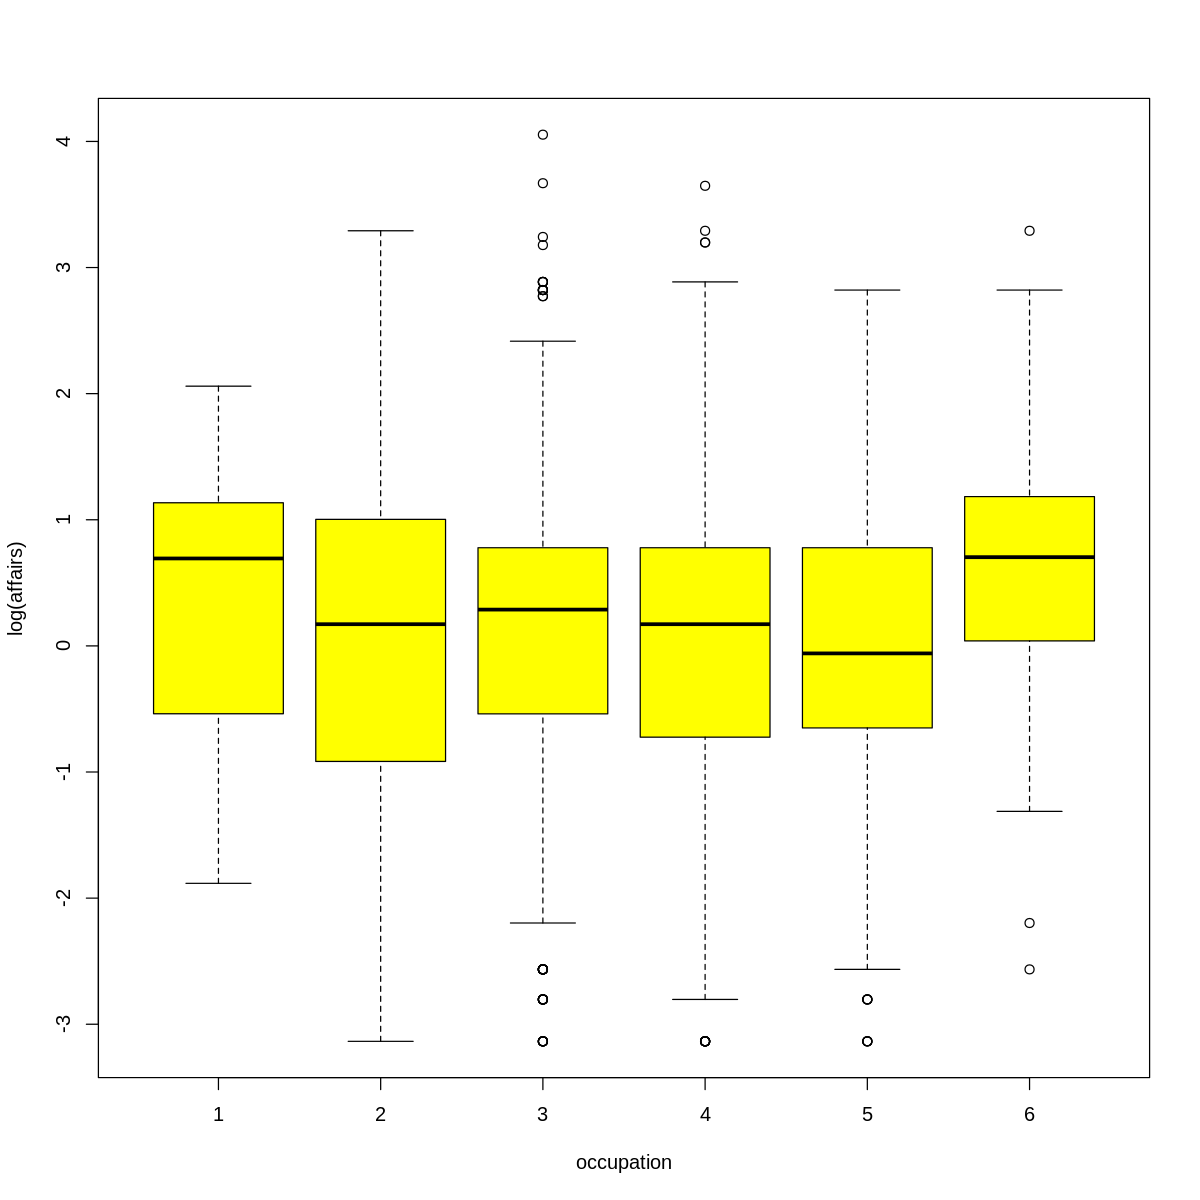

In [141]:
# применяем критерий Краскела-Уоллиса
kruskal_result_occupation = kruskal.test(log(affairs) ~ occupation, data)
print(kruskal_result_occupation)
    
# Рисуем boxplot
options(repr.plot.width=10, repr.plot.height=10)
boxplot(log(affairs) ~ occupation, data, col = 'yellow')


	Kruskal-Wallis rank sum test

data:  log(affairs) by occupation_husb
Kruskal-Wallis chi-squared = 20.982, df = 5, p-value = 0.0008165



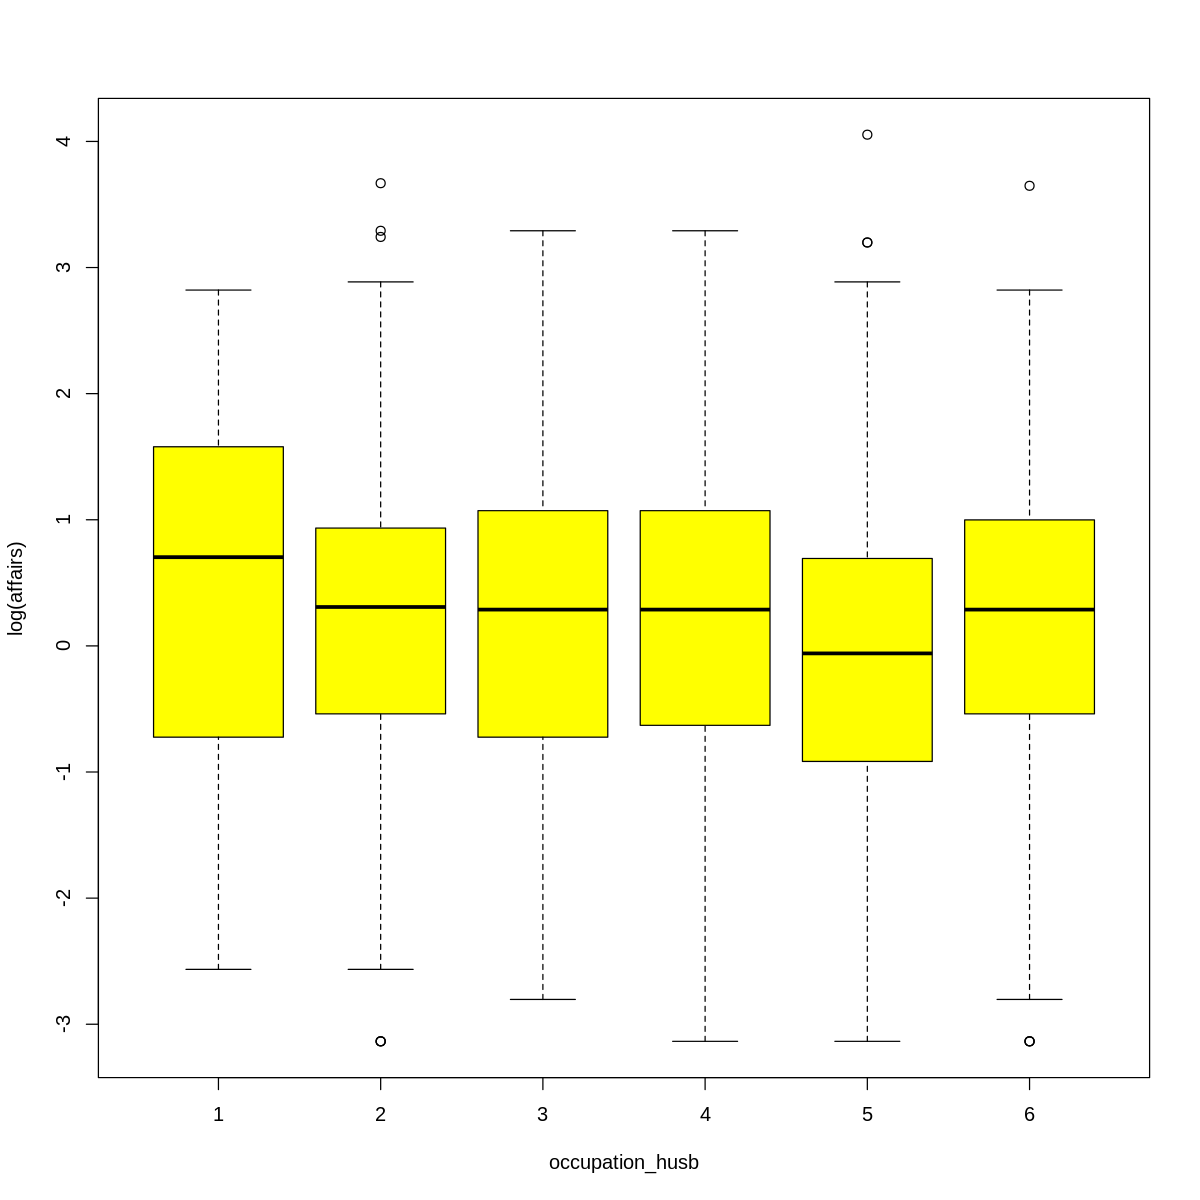

In [142]:
# применяем критерий Краскела-Уоллиса
kruskal_result_occupation_husb = kruskal.test(log(affairs) ~ occupation_husb, data)
print(kruskal_result_occupation_husb)
    
# Рисуем boxplot
options(repr.plot.width=10, repr.plot.height=10)
boxplot(log(affairs) ~ occupation_husb, data, col = 'yellow')

МПГ.

In [143]:
pvals = c(kruskal_result_rate_marriage$p.value, kruskal_result_age$p.value, 
        kruskal_result_yrs_married$p.value, kruskal_result_children$p.value, 
        kruskal_result_religious$p.value, kruskal_result_educ$p.value,
        kruskal_result_occupation$p.value, kruskal_result_occupation_husb$p.value)
pvals

[1] 8.611183e-04 3.974891e-77 2.092768e-97 1.437106e-65 1.143630e-09
[6] 3.396078e-02 6.372848e-02 8.164722e-04

In [144]:
corr_pvals = p.adjust(pvals, method = 'holm')
corr_pvals

[1] 3.265889e-03 2.782424e-76 1.674215e-96 8.622634e-65 5.718149e-09
[6] 6.792155e-02 6.792155e-02 3.265889e-03

In [145]:
corr_pvals < 0.05

[1]  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE  TRUE

Есть влияние почти всех факторов. Исключение составляют факторы `educ` и `occupation`.

Post-hoc analisys:

In [122]:
system('sudo apt-get install -y librsvg2-dev', intern=TRUE)
system('sudo apt-get install -y libmpfr-dev', intern=TRUE)

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  gir1.2-freedesktop gir1.2-gdkpixbuf-2.0 gir1.2-rsvg-2.0"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
 [6] "  libcairo-script-interpreter2 libcairo2-dev libgdk-pixbuf2.0-dev"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
 [7] "  libpixman-1-dev libxcb-shm0-dev"                                                                                     

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libgmp-dev libgmpxx4ldbl"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  gmp-doc libgmp10-doc libmpfr-doc"                                                                                    

In [123]:
install.packages('PMCMRplus')
library('PMCMRplus')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gmp’, ‘Rmpfr’




Warning message in kwAllPairsNemenyiTest.default(c(-2.19722467733622, 1.17272025129802, :
“Ties are present, p-values are not corrected.”

	Pairwise comparisons using Tukey-Kramer-Nemenyi all-pairs test with Tukey-Dist approximation


data: log(affairs) by rate_marriage



P value adjustment method: single-step

alternative hypothesis: two.sided



  1       2       3       4      
2 0.65007 -       -       -      
3 0.36509 0.98546 -       -      
4 0.85969 0.92685 0.35444 -      
5 0.99932 0.06613 0.00043 0.07691

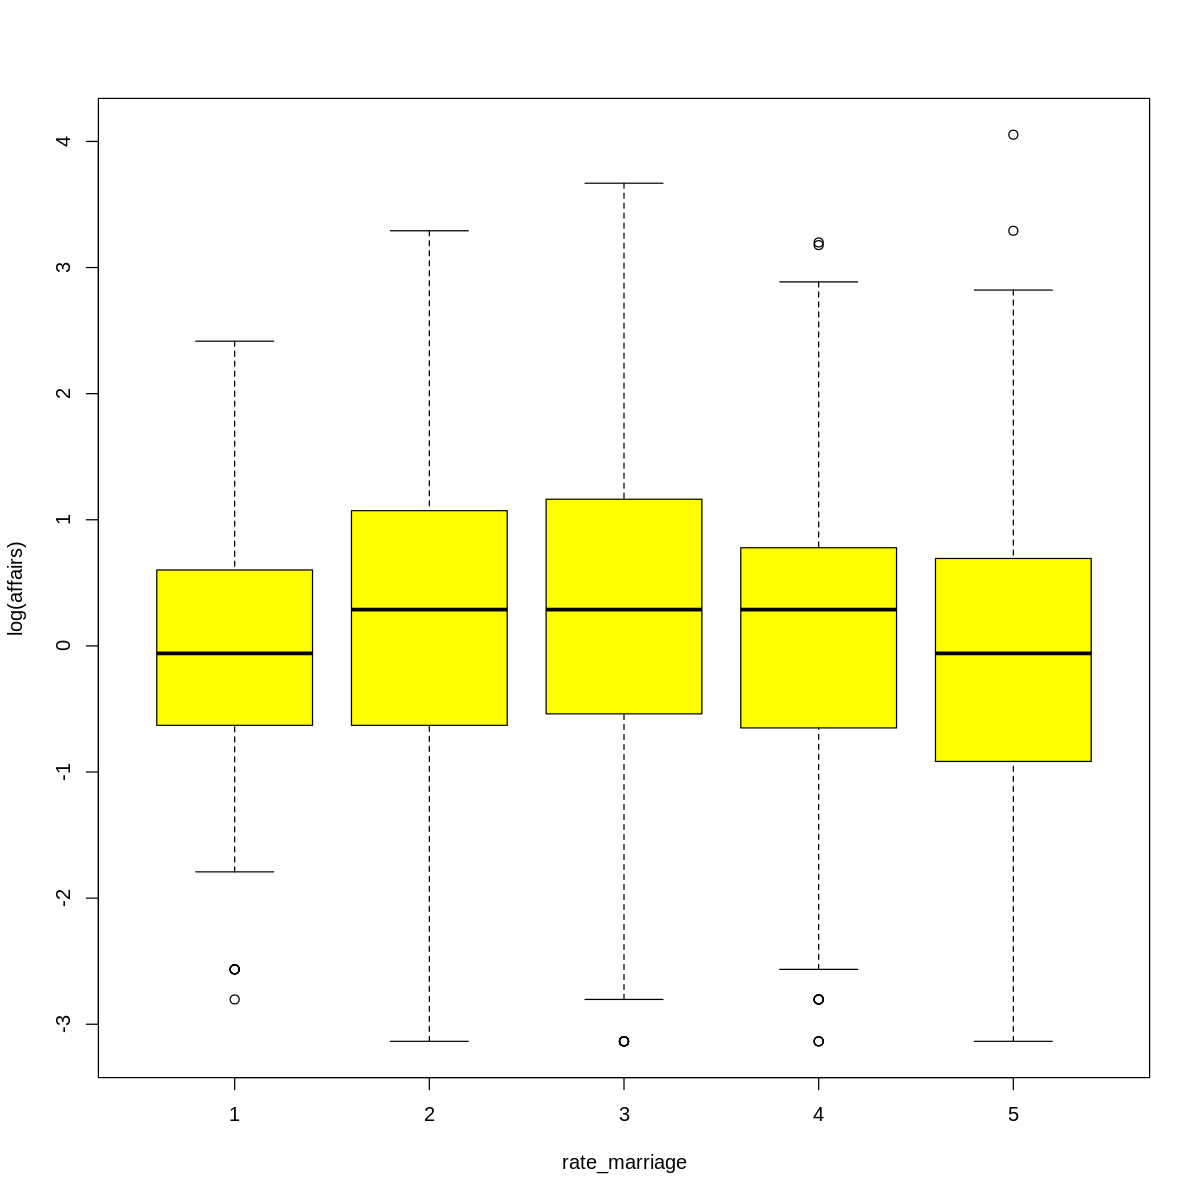

In [167]:
kwAllPairsNemenyiTest(log(affairs) ~ rate_marriage, data)

options(repr.plot.width=10, repr.plot.height=10)
boxplot(log(affairs) ~ rate_marriage, data, col = 'yellow')

Есть различие только между качеством отношений 3 и 5. Посмотрим на боксплоты: видно, что чаще изменяют те, у кого отношения хуже (уровень отношений 3 против уровня отношений 5).

Warning message in kwAllPairsNemenyiTest.default(c(-2.19722467733622, 1.17272025129802, :
“Ties are present, p-values are not corrected.”

	Pairwise comparisons using Tukey-Kramer-Nemenyi all-pairs test with Tukey-Dist approximation


data: log(affairs) by age



P value adjustment method: single-step

alternative hypothesis: two.sided



   17.5    22      27      32     37    
22 0.1202  -       -       -      -     
27 0.0034  9.0e-06 -       -      -     
32 7.2e-07 < 2e-16 7.8e-14 -      -     
37 1.6e-08 < 2e-16 7.2e-14 0.1257 -     
42 2.0e-09 < 2e-16 < 2e-16 0.0023 0.8999

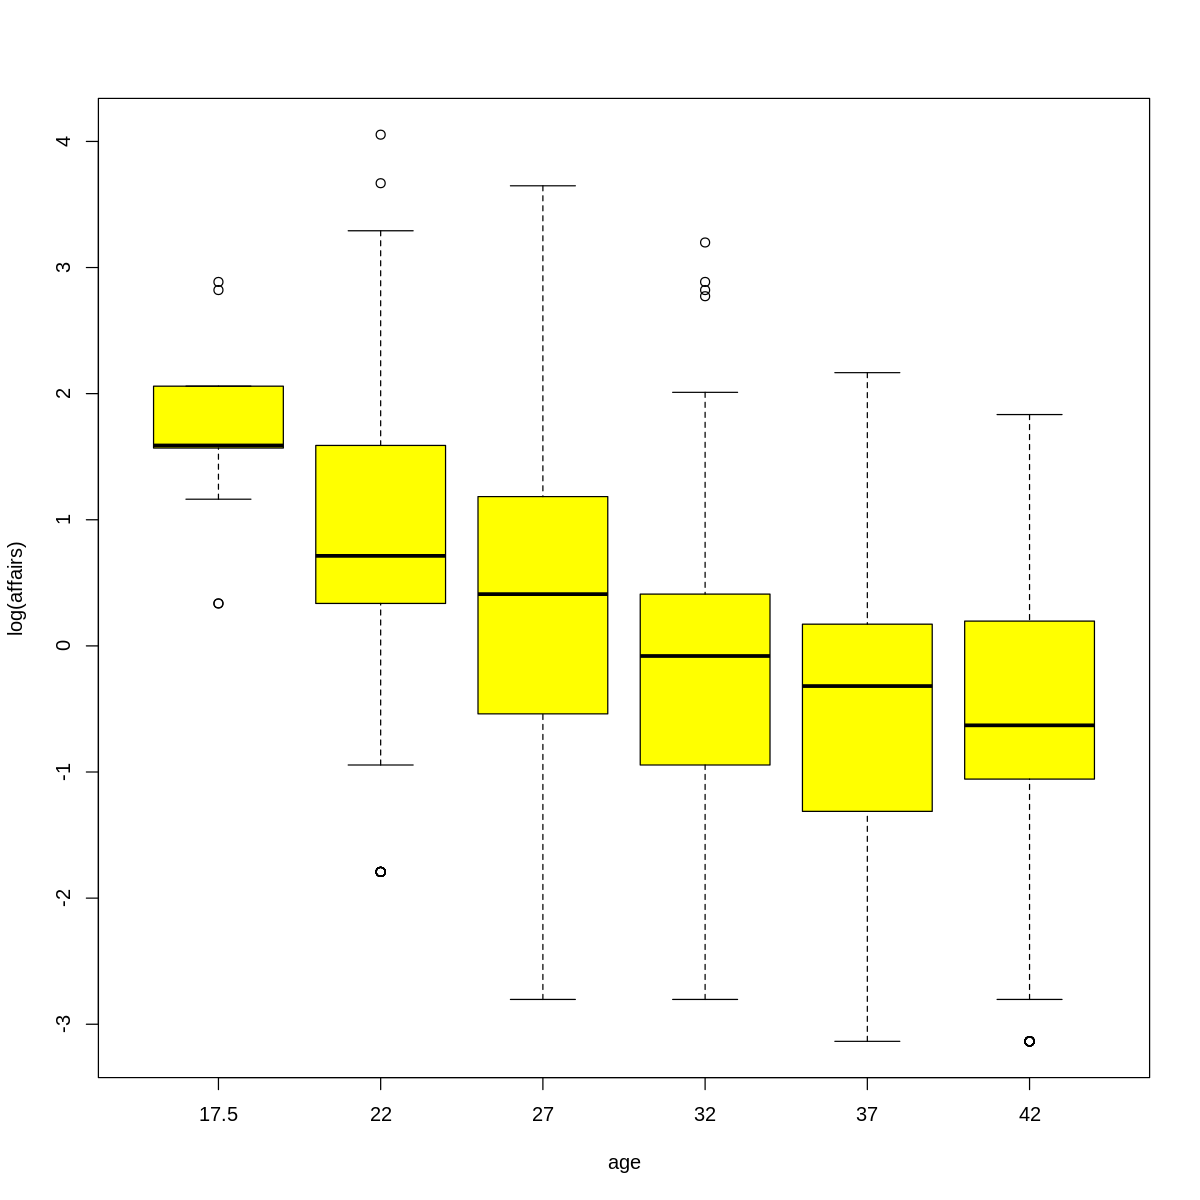

In [168]:
kwAllPairsNemenyiTest(log(affairs) ~ age, data)

options(repr.plot.width=10, repr.plot.height=10)
boxplot(log(affairs) ~ age, data, col = 'yellow')

Незначительно отличаются только количество измен между молодыми (17.5 и 22 года соответственно незначимо отличаются) и между зрелыми (37 и 42 года соответственно незначимо отличаются). Во всех остальных случаях отличия значимы, причем молодые изменяют чаще.

Warning message in kwAllPairsNemenyiTest.default(c(-2.19722467733622, 1.17272025129802, :
“Ties are present, p-values are not corrected.”

	Pairwise comparisons using Tukey-Kramer-Nemenyi all-pairs test with Tukey-Dist approximation


data: log(affairs) by yrs_married



P value adjustment method: single-step

alternative hypothesis: two.sided



     0.5     2.5     6       9       13      16.5   
2.5  0.13399 -       -       -       -       -      
6    0.00014 4.1e-11 -       -       -       -      
9    1.8e-06 8.1e-14 0.05649 -       -       -      
13   1.8e-08 < 2e-16 2.0e-06 0.26836 -       -      
16.5 8.5e-11 < 2e-16 6.2e-14 3.4e-05 0.25122 -      
23   3.9e-13 < 2e-16 4.4e-14 4.0e-11 0.00011 0.13943

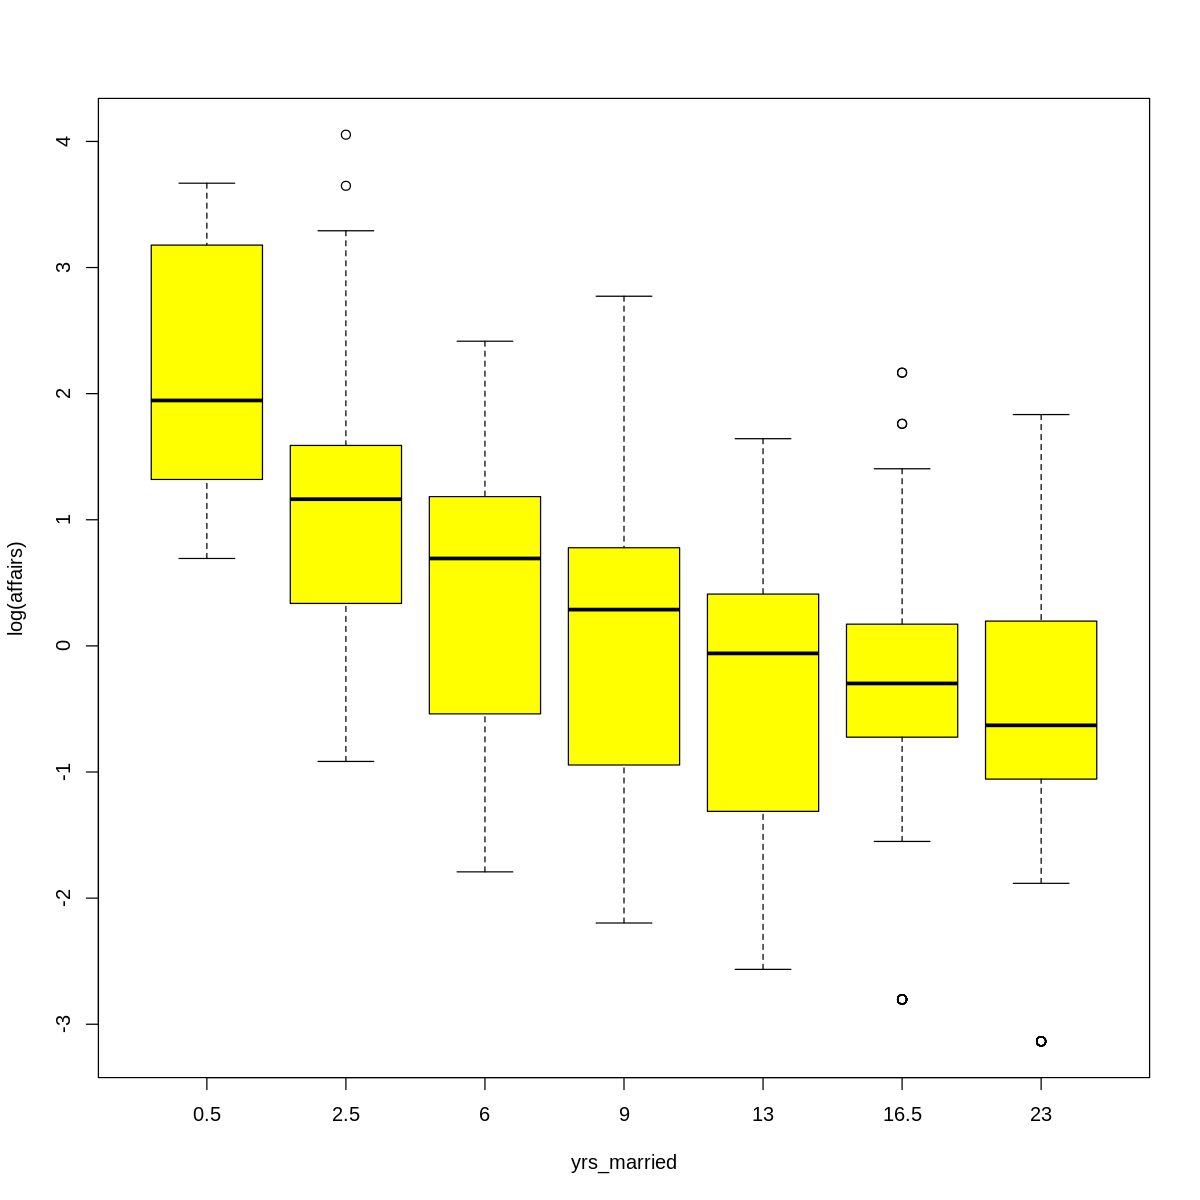

In [169]:
kwAllPairsNemenyiTest(log(affairs) ~ yrs_married, data)

options(repr.plot.width=10, repr.plot.height=10)
boxplot(log(affairs) ~ yrs_married, data, col = 'yellow')

Незначимые отличия появляются в основном только в ячейках рядом с диагональю (то есть, для признаков, близких по значениям). В остальных случаях все отличия значимы. Также стоит отметить, что изменяют чаще те, кто провел меньше лет в браке.

Warning message in kwAllPairsNemenyiTest.default(c(-2.19722467733622, 1.17272025129802, :
“Ties are present, p-values are not corrected.”

	Pairwise comparisons using Tukey-Kramer-Nemenyi all-pairs test with Tukey-Dist approximation


data: log(affairs) by children



P value adjustment method: single-step

alternative hypothesis: two.sided



    0       1       2      3      4     
1   7.5e-06 -       -      -      -     
2   < 2e-16 4.1e-10 -      -      -     
3   < 2e-16 6.9e-14 0.0642 -      -     
4   3.5e-14 1.2e-12 0.0098 0.7885 -     
5.5 5.9e-14 1.2e-09 0.0218 0.6883 0.9993

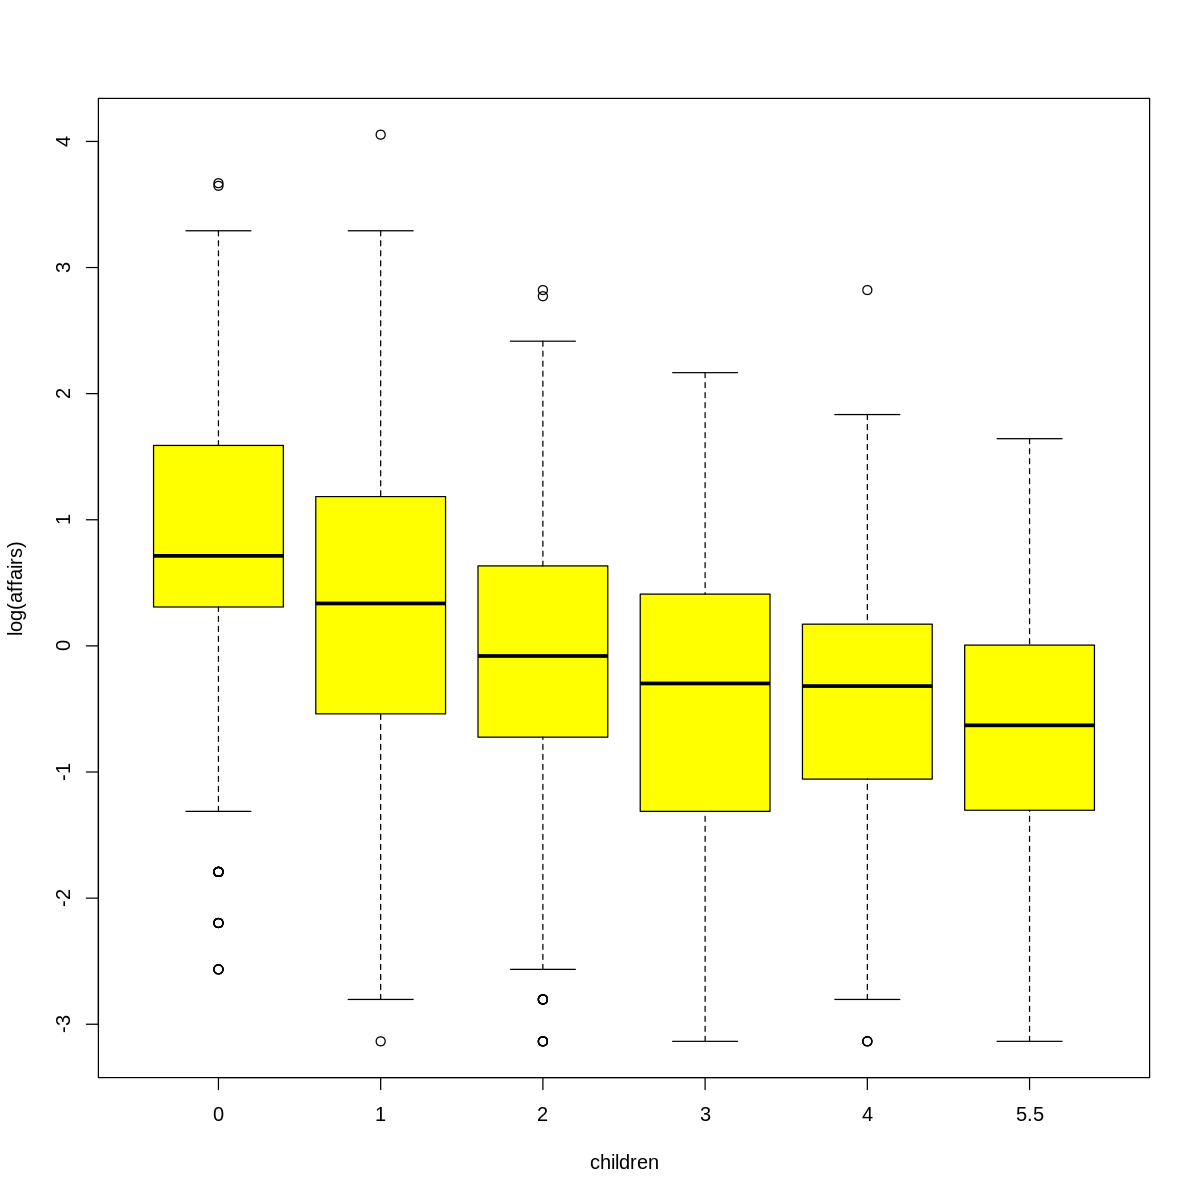

In [171]:
kwAllPairsNemenyiTest(log(affairs) ~ children, data)

options(repr.plot.width=10, repr.plot.height=10)
boxplot(log(affairs) ~ children, data, col = 'yellow')

Чем меньше детей, тем чаще измены - вот ключевой вывод из исследования зависимости частот времени, проведенного на стороне и количества детей. То есть, дети укрепляют семьи. Также стоит отметить, что с ростом количества детей разница в эффекте уменьшается. Намного чаще изменяют те, у кого нет детей.

Warning message in kwAllPairsNemenyiTest.default(c(-2.19722467733622, 1.17272025129802, :
“Ties are present, p-values are not corrected.”

	Pairwise comparisons using Tukey-Kramer-Nemenyi all-pairs test with Tukey-Dist approximation


data: log(affairs) by religious



P value adjustment method: single-step

alternative hypothesis: two.sided



  1       2      3     
2 4.2e-05 -      -     
3 1.8e-06 0.8058 -     
4 3.0e-08 0.0033 0.0174

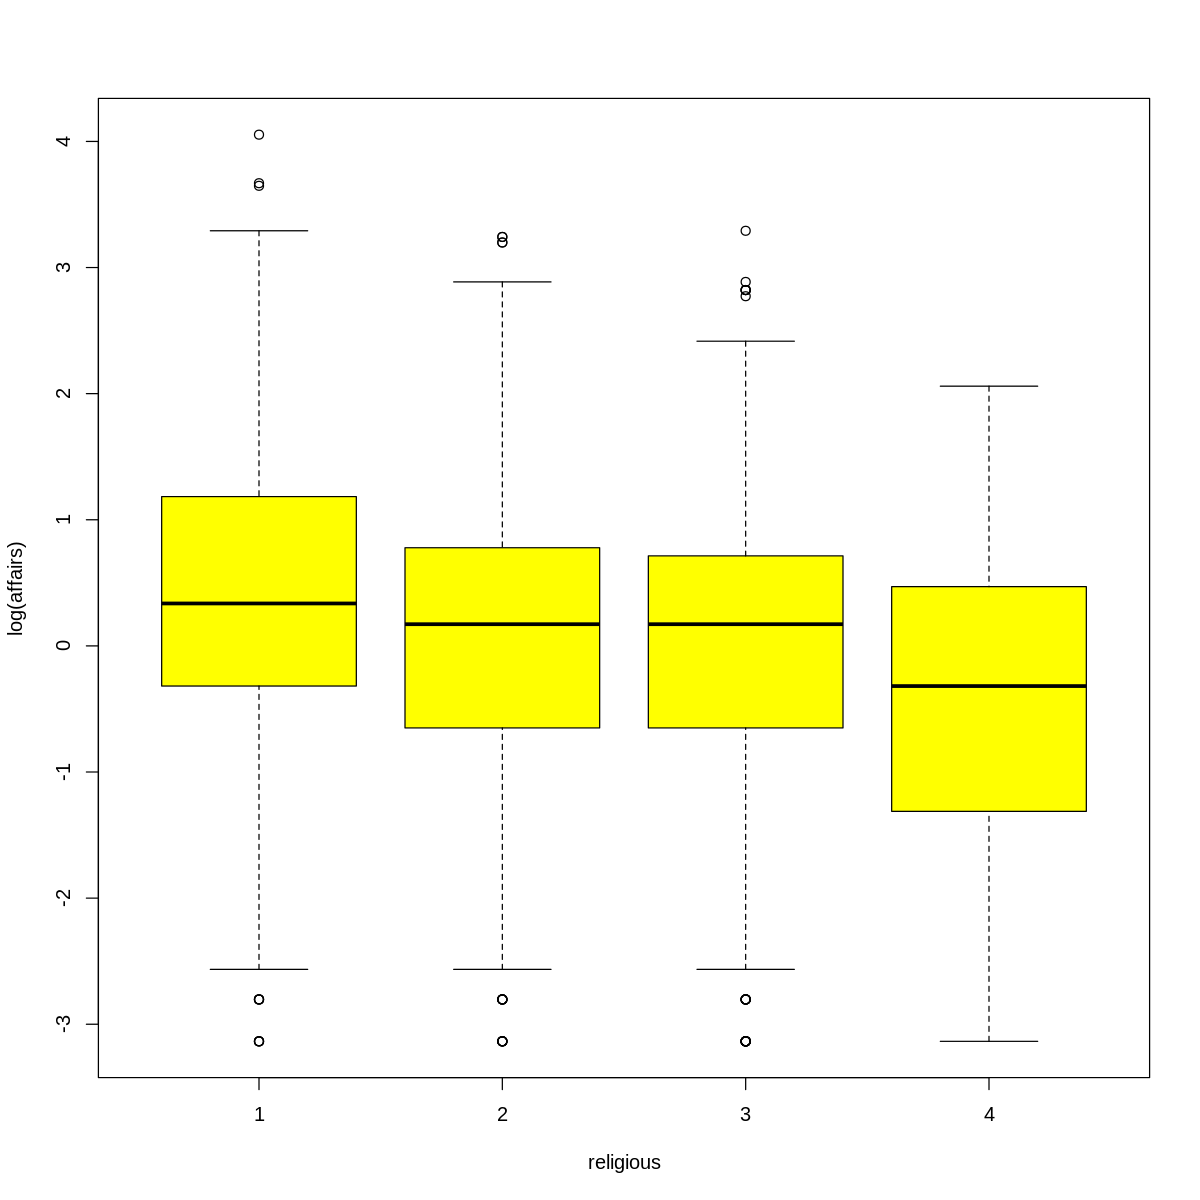

In [172]:
kwAllPairsNemenyiTest(log(affairs) ~ religious, data)

options(repr.plot.width=10, repr.plot.height=10)
boxplot(log(affairs) ~ religious, data, col = 'yellow')

Из результатов пост-хок анализа и боксплотов видно, что и вера укрепляет отношения. Шах и мат, атеисты!

Warning message in kwAllPairsNemenyiTest.default(c(-2.19722467733622, 1.17272025129802, :
“Ties are present, p-values are not corrected.”

	Pairwise comparisons using Tukey-Kramer-Nemenyi all-pairs test with Tukey-Dist approximation


data: log(affairs) by occupation_husb



P value adjustment method: single-step

alternative hypothesis: two.sided



  1      2      3      4      5     
2 0.5142 -      -      -      -     
3 0.2682 0.9329 -      -      -     
4 0.2837 0.9604 0.9989 -      -     
5 0.0175 0.0082 0.6539 0.0447 -     
6 0.5693 1.0000 0.9788 0.9953 0.1604

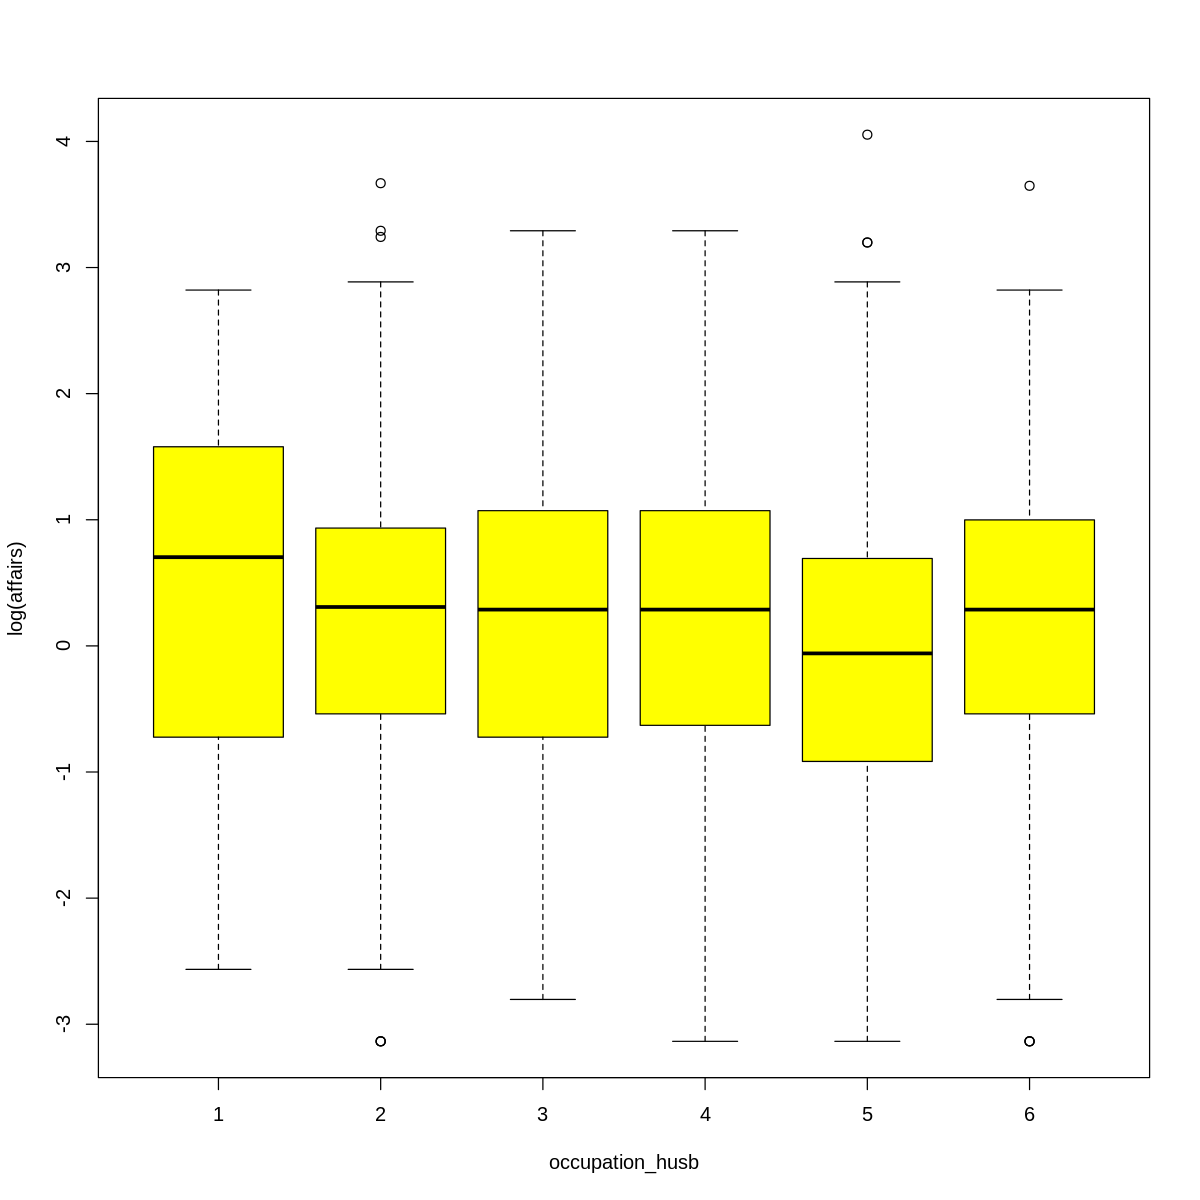

In [173]:
kwAllPairsNemenyiTest(log(affairs) ~ occupation_husb, data)

options(repr.plot.width=10, repr.plot.height=10)
boxplot(log(affairs) ~ occupation_husb, data, col = 'yellow')

А вот тут значимые отличия оказались только между студентом и человеком, занимающим административную должность, а также между педагогом или творческим человеком и человеком, занимающим административную должность. При этом стоит отметить, что люди, занимающим административную должность, изменяют реже.

Проверьте, есть ли зависимость от того, заняты супруги одним и тем же видом деятельности (по категориям) или разными.

In [153]:
same_occupation = (data$occupation == data$occupation_husb)
data$same_occupation = same_occupation
head(data)

,X,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,same_occupation
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1,0,3,32,9.0,3,3,17,2,5,0.1111111,FALSE
2,1,3,27,13.0,3,1,14,3,4,3.2307692,FALSE
3,2,4,22,2.5,0,1,16,3,5,1.3999996,FALSE
4,3,4,37,16.5,4,3,16,5,5,0.7272727,TRUE
5,4,5,27,9.0,1,1,14,3,4,4.6666660,FALSE
6,5,4,27,9.0,0,2,14,3,4,4.6666660,FALSE



	Kruskal-Wallis rank sum test

data:  log(data$affairs) and same_occupation
Kruskal-Wallis chi-squared = 1.1355, df = 1, p-value = 0.2866


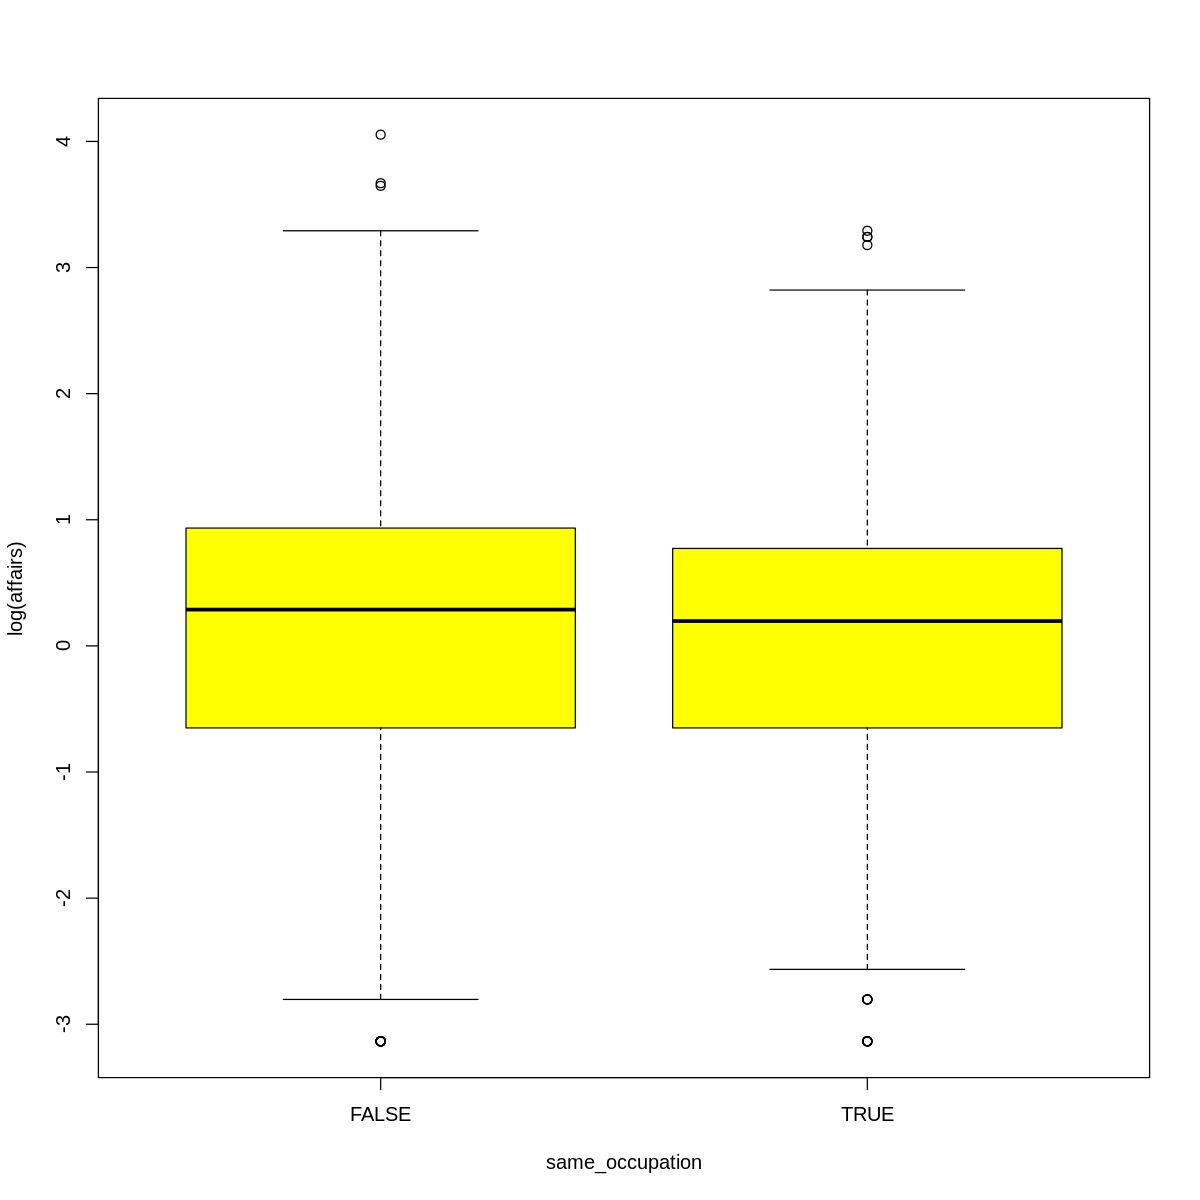

In [155]:
kruskal_result_same_occupation = kruskal.test(log(data$affairs), same_occupation)
boxplot(log(affairs) ~ same_occupation, data, col = 'yellow')
kruskal_result_same_occupation

Как видно из проведенной работы, частота измен не зависит от того, схож ли род деятельности у супругов.

Исследуйте совместное влияние некоторых фактором методами многофакторного дисперсионного анализа. Поясните, почему вы выбрали именно эти факторы.

Выберем признаки: религиозность, возраст и количество детей, а также совместное влияние признаков количество детей и религиозность и количество детей и возраст. Выбор пал именно на эти признаки, так как, как мне кажется, они наиболее очевидным образом связаны.

In [175]:
summary(aov(log(affairs) ~ age * children + religious * children, data))

                     Df Sum Sq Mean Sq F value   Pr(>F)    
age                   1  480.3   480.3 389.638  < 2e-16 ***
children              1   70.1    70.1  56.861 6.99e-14 ***
religious             1   10.9    10.9   8.857  0.00295 ** 
age:children          1   29.0    29.0  23.539 1.32e-06 ***
children:religious    1    0.3     0.3   0.273  0.60115    
Residuals          2047 2523.4     1.2                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

**Вывод:** статистически незначимо влияет на таргет только совместный признак (количество детей, религиозность). Все остальные признаки (включая совместное влияние возраста и количества детей) ощутимо влияют на таргет.